# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Cryptocurrency has become a global trending topic, specifically for its trading activities and how its extremely high risk-high return characteristics attract some individuals to try their luck for short term gain. Of course, the decisions prior to executing the trading positions must be taken carefully, using sufficient analysis and data visualizations. One of the most prominent cryptocurrency is called Ethereum. In this notebook, a web scrapping activity will be conducted on a renowned Ethereum website to do some quick analysis on its historical price data

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [29]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [30]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [31]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
<title>Ethereum USD Historical Data | CoinGecko</title>
<meta content="Get Ethereum (ETH) USD historical prices." name="description">
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-NP34MX7');</script>
<link as="font" crossorigin="" href="https://static.coingecko.com/webfonts/fa-solid-900.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin="" 

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [32]:
table_ethereum = soup.find('table', attrs={'class': 'table table-striped text-sm text-lg-normal'})
print(table_ethereum.prettify()[1:1000])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="text-center">
    $27,149,143,847
   </td>
   <td class="text-center">
    $2,169.40
   </td>
   <td class="text-center">
    N/A
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-29
   </th>
   <td class="text-center">
    $243,040,539,437
   </td>
   <td class="text-center">
    $30,629,329,806
   </td>
   <td class="text-center">
    $2,087.52
   </td>
   <td class="text-center">
    $2,169.40
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-cente


Finding row length.

In [33]:
row = table_ethereum.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

547

Do the scrapping process here (please change this markdown with your explanation)

In [40]:
temp = [] #initiating a tuple

#get date 
for table_rows in table_ethereum.find_all('tr'):
    # Find Header Date
    header_date = table_rows.find('th', attrs={'class': 'font-semibold text-center'})
    if(header_date) != None:
        periode = header_date.text.replace("-", "/")
    
    #get volume
    column_iteration = 0
    for table_columns in table_rows.find_all('td'):
        
        if (column_iteration) == 0:
            market_cap = table_columns.text.replace("$", "").replace(",", "").strip()
        elif (column_iteration) == 1:
            volume = table_columns.text.replace("$", "").replace(",", "").strip()
        elif (column_iteration) == 2:
            open_price = table_columns.text.replace("$", "").replace(",", "").strip()
        elif (column_iteration) == 3:
            close = table_columns.text.replace("$", "").replace(",", "").strip()
        if column_iteration == 3:
            temp.append((periode,market_cap,volume,open_price,close))      
        column_iteration += 1
    
    
temp

[('2021/06/30', '253607549372', '27149143847', '2169.40', 'N/A'),
 ('2021/06/29', '243040539437', '30629329806', '2087.52', '2169.40'),
 ('2021/06/28', '229354016311', '24316408028', '1973.93', '2087.52'),
 ('2021/06/27', '209989265221', '24249510321', '1817.05', '1973.93'),
 ('2021/06/26', '213871849532', '25981381067', '1833.46', '1817.05'),
 ('2021/06/25', '231644258719', '22447489242', '1990.08', '1833.46'),
 ('2021/06/24', '229518675837', '28098744045', '1971.11', '1990.08'),
 ('2021/06/23', '216876757209', '38755019937', '1875.36', '1971.11'),
 ('2021/06/22', '223202708789', '39499960408', '1900.12', '1875.36'),
 ('2021/06/21', '261478202409', '26235850447', '2251.56', '1900.12'),
 ('2021/06/20', '253396709039', '20456963375', '2176.31', '2251.56'),
 ('2021/06/19', '260039646334', '26204484921', '2231.55', '2176.31'),
 ('2021/06/18', '275415199642', '25708624827', '2380.74', '2231.55'),
 ('2021/06/17', '274666655405', '26150320395', '2365.87', '2380.74'),
 ('2021/06/16', '2983243

## Creating data frame & Data wrangling

Put the array into dataframe

In [41]:
temp=temp[::-1]
temp

[('2020/01/01', '14097451632', '7103187151', '129.19', '130.48'),
 ('2020/01/02', '14230588104', '6623732041', '130.48', '127.05'),
 ('2020/01/03', '13859793330', '6497297884', '127.05', '133.70'),
 ('2020/01/04', '14613194776', '9655245100', '133.70', '134.14'),
 ('2020/01/05', '14636213160', '6958393690', '134.14', '135.01'),
 ('2020/01/06', '14738834254', '7260645128', '135.01', '143.81'),
 ('2020/01/07', '15692578635', '9514201882', '143.81', '143.02'),
 ('2020/01/08', '15656491188', '9440938788', '143.02', '140.27'),
 ('2020/01/09', '15364547562', '10095847759', '140.27', '137.86'),
 ('2020/01/10', '14998595868', '7280640218', '137.86', '144.60'),
 ('2020/01/11', '15647071448', '10273370788', '144.60', '142.18'),
 ('2020/01/12', '15564837468', '9737605323', '142.18', '145.42'),
 ('2020/01/13', '15859031094', '8488793478', '145.42', '143.59'),
 ('2020/01/14', '15715287657', '8019794567', '143.59', '165.99'),
 ('2020/01/15', '18075462341', '18970204899', '165.99', '166.25'),
 ('2020

In [45]:
import pandas as pd

df_ethereum = pd.DataFrame(temp, columns = ('periode','market_cap','volume', 'open_price', 'close'))
df_ethereum.head()

,periode,market_cap,volume,open_price,close
0,2020/01/01,14097451632,7103187151,129.19,130.48
1,2020/01/02,14230588104,6623732041,130.48,127.05
2,2020/01/03,13859793330,6497297884,127.05,133.70
3,2020/01/04,14613194776,9655245100,133.70,134.14
4,2020/01/05,14636213160,6958393690,134.14,135.01


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [47]:
df_ethereum.dtypes

periode       object
market_cap    object
volume        object
open_price    object
close         object
dtype: object

In [48]:
df_ethereum['periode'] = df_ethereum['periode'].astype('datetime64')
df_ethereum['market_cap'] = df_ethereum['market_cap'].astype('float64')
df_ethereum['volume'] = df_ethereum['volume'].astype('float64')
df_ethereum['open_price'] = df_ethereum['open_price'].astype('float64')
df_ethereum.dtypes

periode       datetime64[ns]
market_cap           float64
volume               float64
open_price           float64
close                 object
dtype: object

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [53]:
#changing periode as index to make it as the x-axis when plotting
df_ethereum = df_ethereum.set_index('periode')

<AxesSubplot:xlabel='periode'>

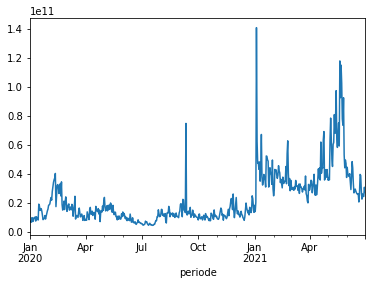

In [54]:
#Visualizing with line plot
df_ethereum['volume'].plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='periode'>

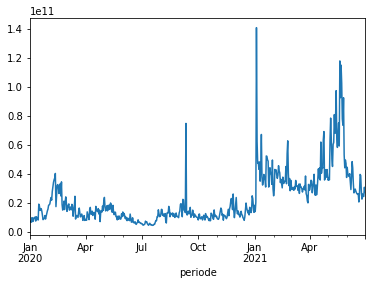

In [55]:
df_ethereum['volume'].plot()

Around Sep'20 and Jan'20, volume spikes occurred which seemed to correct itself within a few days. The overall trend is increasing since Jan'20 with some volatility in more recent period.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.